In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Generate sequence with noise

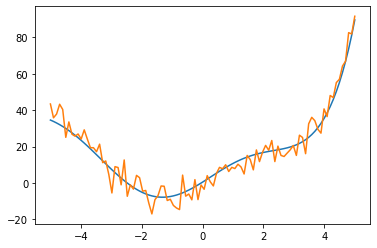

In [51]:
np.random.seed(0)
r = np.random.randn(100) * 5
x = np.linspace(-5, 5, 100)
y0 = 10*np.sin(x) + np.exp(x)/2 + x**2
y = y0 + r
plt.plot(x, y0)
plt.plot(x, y)

# Moving average filter

In [46]:
def MA(seq, w):
    """
    Moving average filter
        seq: sequence;
        w: window size, should be odd
    """
    out0 = np.convolve(seq,np.ones(w,dtype=int),'valid')/w
    r = np.arange(1,w-1,2)
    start = np.cumsum(seq[:w-1])[::2]/r
    stop = (np.cumsum(seq[:-w:-1])[::2]/r)[::-1]
    return np.concatenate((start , out0, stop))

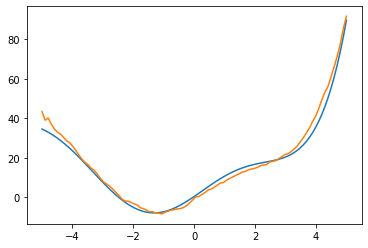

In [74]:
plt.plot(x, y0)
plt.plot(x, MA(y, 15))

# Exponentially weighted average filter

In [89]:
def ewa(y, beta):
    """Exponentially weighted average."""
    n = len(y)
    zs = np.zeros(n)
    z = 0
    for i in range(n):
        z = beta*z + (1 - beta)*y[i]
        zs[i] = z
    return zs

def ewabc(y, beta):
    """Exponentially weighted average with hias correction."""
    n = len(y)
    zs = np.zeros(n)
    z = 0
    for i in range(n):
        z = beta*z + (1 - beta)*y[i]
        zc = z/(1 - beta**(i+1))
        zs[i] = zc
    return zs

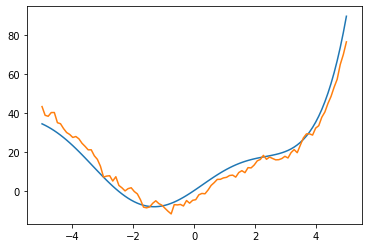

In [126]:
plt.plot(x, y0)
plt.plot(x, ewabc(y, 0.7))
# plt.plot(x, y)

# Weighted Moving average

In [218]:
def MA_w(seq, beta=0.9, r=3):
    """
    exponentially weighted moving average
    """
    res = np.zeros(len(seq))
    w = list(map(lambda x: beta**abs(x), range(-r+1, r)))
    for i in range(len(seq)):
        z = 0
        divider = 0
        if (i>=r-1) and (i<=len(seq)-r):
            for iter_, j in enumerate(range(i-r+1, i+r)):
                z += seq[j] * w[iter_]
                divider += w[iter_]
            z /= divider
        else:
            z = seq[i]
        res[i] = z
    return res

In [228]:
def MA_w(seq, beta=0.9, r=3):
    """
    exponentially weighted moving average
    """
    res = np.zeros(len(seq))
    w = list(map(lambda x: beta**abs(x), range(-r+1, r)))
    for i in range(len(seq)):
        z = 0
        divider = 0
#         print(i, list(range(max(i-r+1, 0), min(i+r, len(seq)))))
        # do one-side averaging on edges
        for iter_, j in enumerate(range(max(i-r+1, 0), min(i+r, len(seq)))):
            z += seq[j] * w[iter_]
            divider += w[iter_]
        z /= divider
        res[i] = z
    return res

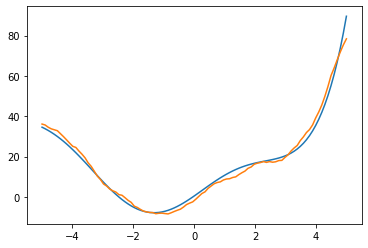

In [237]:
plt.plot(x, y0)
plt.plot(x, MA_w(y, 0.8, r=6))

# Gaussian filter

In [61]:
from scipy.ndimage import gaussian_filter1d

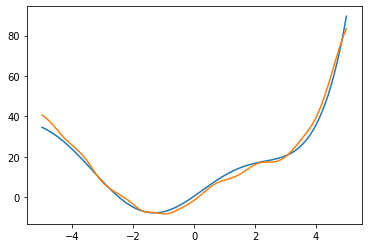

In [69]:
plt.plot(x, y0)
plt.plot(x, gaussian_filter1d(y, 3, mode = 'nearest'))